Run the following line if you don't have any of the libraries

In [1]:
# %%bash
# pip install statsmodels pandas numpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels

import data_prep

In [2]:
data_prep.get_lagged("./data/XLE_energy_etf.csv", n=3)

,Open,High,Low,Close,Adj Close,Volume,Adj Close_1,Adj Close_2,Adj Close_3
Date,,,,,,,,,
2010-01-07,59.740002,60.009998,59.299999,59.910000,45.627445,17449500,45.695988,45.155247,44.789688
2010-01-08,59.700001,60.349998,59.490002,60.299999,45.924469,13344300,45.627445,45.695988,45.155247
2010-01-11,60.689999,60.869999,59.730000,60.220001,45.863533,19459900,45.924469,45.627445,45.695988
2010-01-12,59.299999,59.709999,59.040001,59.349998,45.200943,21510600,45.863533,45.924469,45.627445
2010-01-13,59.320000,59.799999,58.520000,59.570000,45.368496,22137500,45.200943,45.863533,45.924469
...,...,...,...,...,...,...,...,...,...
2020-03-16,27.950001,31.120001,27.670000,27.809999,27.809999,40233600,32.189999,29.469999,33.669998
2020-03-17,28.080000,29.180000,26.950001,28.000000,28.000000,45443600,27.809999,32.189999,29.469999
2020-03-18,26.040001,26.580000,22.879999,23.980000,23.980000,52135800,28.000000,27.809999,32.189999


In [3]:
pd.read_csv("./data/SnP_500.csv", index_col="Date").head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


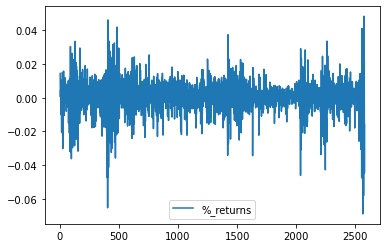

In [4]:
df_perc_returns = data_prep.get_perc_return("./data/SnP_500.csv", column_name="Open")
df_perc_returns.plot()

The way returns are distributed shows a stationary process with no correlation with time 
This also leads us to try out GARCH models since we proabably can model these spikes in volatility.

Following which, we'll look at the full dataset, a concatnation of all the variables together with S&P500

In [5]:
df = pd.read_csv("./data/output.csv", index_col="Date")
df.head()

,Open_Pharm,High_Pharm,Low_Pharm,Close_Pharm,Adj Close_Pharm,Volume_Pharm,Open_Semicon,High_Semicon,Low_Semicon,Close_Semicon,...,Low_Utilities,Close_Utilities,Adj Close_Utilities,Volume_Utilities,Open_Consumer,High_Consumer,Low_Consumer,Close_Consumer,Adj Close_Consumer,Volume_Consumer
Date,,,,,,,,,,,,,,,,,,,,,
4/1/2010,33.150002,33.544998,33.020000,33.535000,26.125103,1622800,28.350000,28.660000,28.299999,28.410000,...,31.010000,31.080000,21.588554,8217600,29.900000,30.110001,29.900000,30.000000,25.967613,5443900
5/1/2010,33.580002,33.580002,33.134998,33.220001,25.879725,1933200,28.450001,28.540001,28.080000,28.250000,...,30.559999,30.709999,21.331547,18023700,30.010000,30.139999,29.820000,30.110001,26.062828,6162200
6/1/2010,33.250000,33.384998,33.169998,33.384998,26.008247,1492400,28.209999,28.450001,28.080000,28.180000,...,30.690001,30.889999,21.456575,12745100,30.090000,30.219999,30.020000,30.150000,26.097452,4246900
7/1/2010,33.285000,33.419998,33.230000,33.330002,25.965412,764600,28.090000,28.160000,27.760000,27.959999,...,30.639999,30.750000,21.359331,6563100,30.340000,30.410000,30.139999,30.400000,26.313848,5736700
8/1/2010,33.259998,33.369999,33.185001,33.340000,25.973190,1218200,27.940001,28.549999,27.870001,28.520000,...,30.520000,30.719999,21.338493,6267600,30.290001,30.410000,30.120001,30.389999,26.305195,6438000


Columns are laballed as such:  VARIABLE_SECTOR

In [8]:
SNP_daily_ret = (df['Adj Close_SNP500']/df['Adj Close_SNP500'].shift(1)) - 1
SNP_daily_ret = SNP_daily_ret.dropna()

In [9]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [10]:
import warnings
warnings.filterwarnings('ignore')

mod = AutoReg(SNP_daily_ret, 1)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:       Adj Close_SNP500   No. Observations:                 2570
Model:                     AutoReg(1)   Log Likelihood                8102.487
Method:               Conditional MLE   S.D. of innovations              0.010
Date:                Thu, 09 Apr 2020   AIC                             -9.143
Time:                        15:21:45   BIC                             -9.137
Sample:                             1   HQIC                            -9.141
                                 2570                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               0.0004      0.000      1.882      0.060   -1.59e-05       0.001
Adj Close_SNP500.L1    -0.1533      0.020     -7.836      0.000      -0.192      -0.115
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -6.5230           +0.0000j            6.5230            0.5000
-----------------------------------------------------------------------------
"""

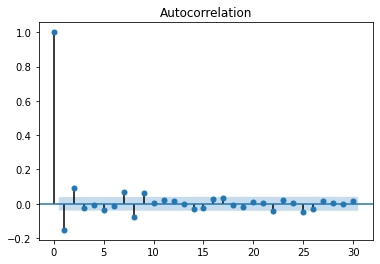

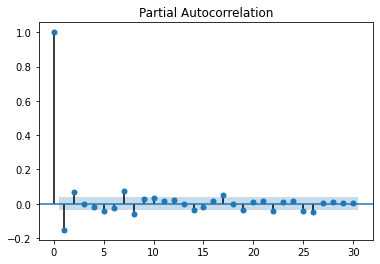

In [11]:
plot_acf(SNP_daily_ret, lags=30)
plt.show()
plot_pacf(SNP_daily_ret, lags=30)
plt.show()

The ACF shows that after lags of t=2, autocorrelation stays near 0 which means a **MA(2)** model

The PACF shows that after lags of t=2, autocorrelation stays near 0 which means an **AR(2)** model

In [12]:
from statsmodels.tsa.arima_model import ARMA

In [13]:
mod = AutoReg(SNP_daily_ret, 2)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:       Adj Close_SNP500   No. Observations:                 2570
Model:                     AutoReg(2)   Log Likelihood                8105.265
Method:               Conditional MLE   S.D. of innovations              0.010
Date:                Thu, 09 Apr 2020   AIC                             -9.147
Time:                        15:21:56   BIC                             -9.138
Sample:                             2   HQIC                            -9.144
                                 2570                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               0.0004      0.000      1.744      0.081   -4.39e-05       0.001
Adj Close_SNP500.L1    -0.1425      0.020     -7.214      0.000      -0.181      -0.104
Adj Close_SNP500.L2     0.0709      0.020      3.591      0.000       0.032       0.110
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.8826           +0.0000j            2.8826            0.5000
AR.2            4.8917           +0.0000j            4.8917            0.0000
-----------------------------------------------------------------------------
"""

In [15]:
ar2 = ARMA(SNP_daily_ret, order=[2,0])
ar2_fit = ar2.fit(disp=0)
print (ar2_fit.summary())
print('\n')

ma2 = ARMA(SNP_daily_ret, order=[0,2])
ma2_fit = ma2.fit(disp=0)
print (ma2_fit.summary())
print('\n')

arma11 = ARMA(SNP_daily_ret, order=[1,1])
arma11_fit = arma11.fit(disp=0)
print (arma11_fit.summary())
print('\n')


                              ARMA Model Results                              
Dep. Variable:       Adj Close_SNP500   No. Observations:                 2570
Model:                     ARMA(2, 0)   Log Likelihood                8112.524
Method:                       css-mle   S.D. of innovations              0.010
Date:                Thu, 09 Apr 2020   AIC                         -16217.048
Time:                        15:22:58   BIC                         -16193.641
Sample:                             0   HQIC                        -16208.562
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0003      0.000      1.754      0.079   -3.91e-05       0.001
ar.L1.Adj Close_SNP500    -0.1424      0.020     -7.216      0.000      -0.181      -0.104
ar.L

AIC values for all the models are extremely similar and hence we look to BIC to decide the best model()

It seems like AR(2) does the best out of all the models.

However, as shown later, adding MA(q) to AR(2) to eliminate autocorrelations yields higher AIC than ARMA(1,1).

In [14]:
## some usful attributes that might be used in future
"""
arma22_fit.aic
arma22_fit.bic
arma22_fit.fittedvalues  ## return fitted values of the model
arma22_fit.predict(start=2568, end=2570)
"""

'\narma33_fit.aic\narma33_fit.bic\narma33_fit.fittedvalues  ## return fitted values of the model\narma33_fit.predict(start=2568, end=2570)\n'

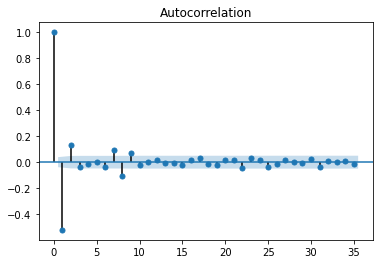

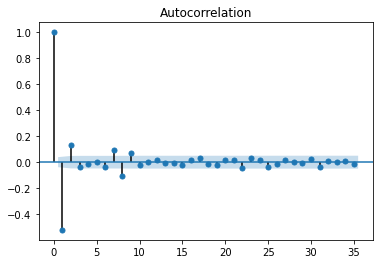

In [16]:
plot_acf(ar2_fit.fittedvalues)

2 lags are present in AR(2) model so we try to fit ARMA(2,2) to rid of the autocorrelations.

In [17]:
arma22 = ARMA(SNP_daily_ret, order=[2,2])
arma22_fit = arma22.fit(disp=0)
print (arma22_fit.summary())
print('\n')

                              ARMA Model Results                              
Dep. Variable:       Adj Close_SNP500   No. Observations:                 2570
Model:                     ARMA(2, 2)   Log Likelihood                8112.633
Method:                       css-mle   S.D. of innovations              0.010
Date:                Thu, 09 Apr 2020   AIC                         -16213.266
Time:                        15:26:31   BIC                         -16178.156
Sample:                             0   HQIC                        -16200.537
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0003      0.000      1.750      0.080   -3.99e-05       0.001
ar.L1.Adj Close_SNP500    -0.2149      0.270     -0.795      0.427      -0.745       0.315
ar.L

AIC at -16213.266 is not lower than AR(2).

So far, our benchmarked models are:
- AR(2)
- ARMA(1,1)
- ARMA(2,2)

Moving on, we add more variables, to build ADL models that would hopefully beat our benchmark models

We'll start from one industry, build ARMA for models with lags $\in (1,5)$ and then look at their BIC values 

**Note:** we chose lags from 1 to 5 because 5 represents 1 trading week and we want to quickly be able to spot changes

We then choose the lagged_model with lowest BIC (BIC tend to give parsimonous model hence it would better fit our needs to prevent too many variables in our models to prevent overfitting) and iteratively add more industries up to the full model

Afterwords, we rid insignificant variables based on their t-stat. We do this iteratively with the final model till all the variables are significant. 

We note that this method may not be the best method since we didn't cover the full subset to see the lowest AIC/BIC but that is too computationally expensive.

It covers a signiicant subset and such iterative addition of variables is generally accepted in statistics.

In [57]:
## Adding more variables
from statsmodels.tsa.api import VAR
from statsmodels.regression.linear_model import OLS


def build_and_model_VAR(main_df:pd.DataFrame, var2add:list ):
    """
    Arguments:
    main_df - output.csv which has ALL the variables
    var2add - the industry, eg. Pharm. The value MUST be inside the colname 
    """
    temp_df = pd.DataFrame()
    for var in var2add:
        for col in main_df.columns:
            if "Open_"+var in col or "Volume_" + var in col:
                try:
                    temp_df.columns
                except:
                    temp_df = main_df[col]
                else:
                    temp_df = pd.concat([temp_df, main_df[col]], axis=1)
                    
    temp_df['Open_SNP500'] = main_df['Open_SNP500']
    temp_df['Volume_SNP500'] = main_df['Volume_SNP500']
    
    temp_df.index = main_df.index
        
    return temp_df

# lagged_df_exog(industries=["Pharm","Utilities"], col2lag=list(pharm_utils.columns))
def lagged_df_exog(industries:list, target="Open_SNP500", method="ARMA", order=[2,0], remove_vars=[]):
    temp_df = build_and_model_VAR(df, industries)
    y = temp_df[target][order[0]:]
    temp_df = temp_df.drop(target, axis=1)
    og = temp_df.columns 
    temp_df = data_prep.get_lagged_df(temp_df,col2lag=list(temp_df.columns), n=order[0])  ## lags every single var
    
    X_lagged = temp_df.drop(og, axis=1)
    if len(remove_vars) != 0:
        for colname in remove_vars:
            X_lagged = X_lagged.drop(colname, axis=1)
    
    if method == "ARMA":
        model = ARMA(y, order=order, exog=X_lagged)
    elif method == "OLS":
        model = OLS(y, X_lagged)
    else:
        raise Exception("method has to be 'ARMA' or 'OLS'.")
        
    results = model.fit()
    return results

def best_lagged_model(industries:list, max_p_lag:int, max_q_lag=0, method="ARMA", start_ic=0, ic_method="BIC"):
    ic = start_ic
    for p in range(1, max_p_lag+1):
        for q in range(max_q_lag+1):
            # q can be 0 but p has to be min 1
            temp_res = lagged_df_exog(industries=industries, order=[p,q])
            if ic_method == "BIC":
                temp_ic = temp_res.bic
            elif ic_method == "AIC":
                temp_ic = temp_res.aic
            else:
                raise Exception("ic_method argument has to be 'BIC' or 'AIC'.")
            if ic == 0:  ## first iteration only
                ic = temp_ic
                res = temp_res
            elif temp_ic < ic:
                ic = temp_ic
                res = temp_res
    ## res will have the lowest ic
    return res

In [54]:
res = lagged_df_exog(["Pharm", "Semicon"])
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Open_SNP500   No. Observations:                 2569
Model:                     ARMA(2, 0)   Log Likelihood              -19466.174
Method:                       css-mle   S.D. of innovations            472.668
Date:                Tue, 07 Apr 2020   AIC                          38960.348
Time:                        14:46:24   BIC                          39042.266
Sample:                             0   HQIC                         38990.047
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1009.0259     79.238     12.734      0.000     853.723    1164.329
Open_Pharm_L1         7.8089      1.505      5.189      0.000       4.859      10.759
Open_Pharm_L2        24.5740      1.428     17.211      0.000      21.775      27.372
Volume_Pharm_L1   -7.974e-05   2.78e-05     -2.872      0.004      -0.000   -2.53e-05
Volume_Pharm_L2    5.943e-05   2.78e-05      2.140      0.032       5e-06       0.000
Open_Semicon_L1      -0.8910      0.510     -1.746      0.081      -1.891       0.109
Open_Semicon_L2     -10.2898      0.524    -19.654      0.000     -11.316      -9.264
Volume_Semicon_L1 -1.829e-06   2.56e-06     -0.713      0.476   -6.85e-06     3.2e-06
Volume_Semicon_L2 -1.595e-05   2.41e-06     -6.610      0.000   -2.07e-05   -1.12e-05
Volume_SNP500_L1  -1.347e-08   9.96e-08     -0.135      0.892   -2.09e-07    1.82e-07
Volume_SNP500_L2   3.721e-08   9.98e-08      0.373      0.709   -1.58e-07    2.33e-07
ar.L1.Open_SNP500    -0.0696      0.030     -2.332      0.020      -0.128      -0.011
ar.L2.Open_SNP500    -0.0343      0.015     -2.320      0.020      -0.063      -0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0152           -5.3056j            5.4019           -0.2801
AR.2           -1.0152           +5.3056j            5.4019            0.2801
-----------------------------------------------------------------------------
"""

In [55]:
res2 = best_lagged_model(["Pharm", "Semicon"], max_p_lag=5)
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Open_SNP500   No. Observations:                 2566
Model:                     ARMA(5, 0)   Log Likelihood              -19158.350
Method:                       css-mle   S.D. of innovations            422.964
Date:                Tue, 07 Apr 2020   AIC                          38380.699
Time:                        14:46:59   BIC                          38567.903
Sample:                             0   HQIC                         38448.573
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3272.7993    164.984     19.837      0.000    2949.437    3596.161
Open_Pharm_L1         8.9015      1.541      5.777      0.000       5.882      11.922
Open_Pharm_L2         7.0249      1.520      4.623      0.000       4.047      10.003
Open_Pharm_L3         6.2577      1.526      4.101      0.000       3.267       9.249
Open_Pharm_L4       -15.6192      1.607     -9.722      0.000     -18.768     -12.470
Open_Pharm_L5       -11.7919      1.410     -8.364      0.000     -14.555      -9.029
Volume_Pharm_L1   -9.011e-05   2.49e-05     -3.615      0.000      -0.000   -4.13e-05
Volume_Pharm_L2    4.418e-05   2.51e-05      1.757      0.079   -5.11e-06    9.35e-05
Volume_Pharm_L3    4.935e-06   2.48e-05      0.199      0.842   -4.37e-05    5.36e-05
Volume_Pharm_L4      -0.0001   2.49e-05     -5.374      0.000      -0.000    -8.5e-05
Volume_Pharm_L5      -0.0001   2.52e-05     -4.591      0.000      -0.000   -6.63e-05
Open_Semicon_L1      -4.3564      0.648     -6.720      0.000      -5.627      -3.086
Open_Semicon_L2      -5.2704      0.596     -8.839      0.000      -6.439      -4.102
Open_Semicon_L3      -4.4022      0.587     -7.496      0.000      -5.553      -3.251
Open_Semicon_L4       0.1903      0.605      0.315      0.753      -0.995       1.376
Open_Semicon_L5      -1.3014      0.497     -2.617      0.009      -2.276      -0.327
Volume_Semicon_L1 -3.418e-06   2.26e-06     -1.515      0.130   -7.84e-06       1e-06
Volume_Semicon_L2 -6.287e-06   2.34e-06     -2.693      0.007   -1.09e-05   -1.71e-06
Volume_Semicon_L3 -2.372e-06   2.16e-06     -1.099      0.272    -6.6e-06    1.86e-06
Volume_Semicon_L4   -1.9e-05   2.32e-06     -8.196      0.000   -2.35e-05   -1.45e-05
Volume_Semicon_L5 -1.827e-05   2.21e-06     -8.253      0.000   -2.26e-05   -1.39e-05
Volume_SNP500_L1   5.134e-09   8.13e-08      0.063      0.950   -1.54e-07    1.65e-07
Volume_SNP500_L2   1.002e-08        nan        nan        nan         nan         nan
Volume_SNP500_L3    5.73e-09        nan        nan        nan         nan         nan
Volume_SNP500_L4   2.234e-08   1.04e-07      0.214      0.831   -1.82e-07    2.27e-07
Volume_SNP500_L5   1.914e-08        nan        nan        nan         nan         nan
ar.L1.Open_SNP500    -0.0138      0.030     -0.458      0.647      -0.073       0.045
ar.L2.Open_SNP500    -0.0452      0.023     -1.962      0.050      -0.090   -4.16e-05
ar.L3.Open_SNP500     0.0409      0.008      5.163      0.000       0.025       0.056
ar.L4.Open_SNP500     0.0519      0.005     10.441      0.000       0.042       0.062
ar.L5.Open_SNP500     0.0471        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1 

Since p-value of L5(Open_SNP500) is NA, we use up till 4th lag.

In [61]:
res2_final = lagged_df_exog(["Pharm", "Semicon"], order=[4,0])
res2_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Open_SNP500   No. Observations:                 2567
Model:                     ARMA(4, 0)   Log Likelihood              -19248.201
Method:                       css-mle   S.D. of innovations        5410401.090
Date:                Tue, 07 Apr 2020   AIC                          38548.403
Time:                        14:56:06   BIC                          38700.516
Sample:                             0   HQIC                         38603.553
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2399.1496    125.792     19.072      0.000    2152.603    2645.697
Open_Pharm_L1         6.0722      1.721      3.529      0.000       2.700       9.445
Open_Pharm_L2         9.0133      1.478      6.099      0.000       6.117      11.910
Open_Pharm_L3        10.6420      2.205      4.825      0.000       6.319      14.965
Open_Pharm_L4       -16.1591      2.492     -6.485      0.000     -21.043     -11.275
Volume_Pharm_L1   -8.701e-05   2.56e-05     -3.393      0.001      -0.000   -3.68e-05
Volume_Pharm_L2    6.362e-05   2.64e-05      2.408      0.016    1.18e-05       0.000
Volume_Pharm_L3   -4.514e-06    2.6e-05     -0.174      0.862   -5.55e-05    4.65e-05
Volume_Pharm_L4      -0.0002   2.67e-05     -5.998      0.000      -0.000      -0.000
Open_Semicon_L1      -2.1532      0.976     -2.207      0.027      -4.065      -0.241
Open_Semicon_L2      -5.7067      0.907     -6.293      0.000      -7.484      -3.929
Open_Semicon_L3      -6.0424      0.786     -7.685      0.000      -7.583      -4.501
Open_Semicon_L4       0.1209      0.839      0.144      0.885      -1.524       1.765
Volume_Semicon_L1 -1.742e-06   2.36e-06     -0.739      0.460   -6.36e-06    2.88e-06
Volume_Semicon_L2 -6.652e-06   2.52e-06     -2.641      0.008   -1.16e-05   -1.72e-06
Volume_Semicon_L3 -5.085e-06   2.32e-06     -2.190      0.029   -9.64e-06   -5.33e-07
Volume_Semicon_L4 -2.072e-05   2.76e-06     -7.515      0.000   -2.61e-05   -1.53e-05
Volume_SNP500_L1  -5.056e-09   2.71e-07     -0.019      0.985   -5.35e-07    5.25e-07
Volume_SNP500_L2   1.107e-08   2.81e-08      0.395      0.693   -4.39e-08    6.61e-08
Volume_SNP500_L3   1.985e-08        nan        nan        nan         nan         nan
Volume_SNP500_L4   1.632e-08   3.45e-07      0.047      0.962    -6.6e-07    6.93e-07
ar.L1.Open_SNP500    -0.0521      0.065     -0.801      0.423      -0.179       0.075
ar.L2.Open_SNP500    -0.0634      0.046     -1.382      0.167      -0.153       0.027
ar.L3.Open_SNP500     0.0162      0.015      1.090      0.276      -0.013       0.045
ar.L4.Open_SNP500     0.0588        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1940           -0.0000j            2.1940           -0.5000
AR.2           -0.1131           -1.8981j            1.9015           -0.2595
AR.3           -0.1131           +1.8981j            1.9015            0.2595
AR.4            2.1447           -0.0000j            2.1447           -0.0000
-----------------------------------------------------------------------------
"""

In [65]:
res3 = best_lagged_model(["Pharm", "Semicon", "Utilities"], max_p_lag=5)
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Open_SNP500   No. Observations:                 2566
Model:                     ARMA(5, 0)   Log Likelihood              -19097.173
Method:                       css-mle   S.D. of innovations            412.999
Date:                Tue, 07 Apr 2020   AIC                          38278.346
Time:                        14:59:45   BIC                          38524.051
Sample:                             0   HQIC                         38367.430
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3791.0299    290.658     13.043      0.000    3221.350    4360.710
Open_Pharm_L1           9.9385      1.549      6.414      0.000       6.902      12.975
Open_Pharm_L2           9.3665      1.555      6.024      0.000       6.319      12.414
Open_Pharm_L3           3.7265      1.662      2.243      0.025       0.470       6.983
Open_Pharm_L4         -17.8002      1.730    -10.290      0.000     -21.191     -14.410
Open_Pharm_L5         -10.4805      1.582     -6.625      0.000     -13.581      -7.380
Volume_Pharm_L1        -0.0001   2.46e-05     -4.130      0.000      -0.000   -5.33e-05
Volume_Pharm_L2      3.365e-05    2.5e-05      1.348      0.178   -1.53e-05    8.26e-05
Volume_Pharm_L3      1.774e-05   2.45e-05      0.723      0.470   -3.03e-05    6.58e-05
Volume_Pharm_L4        -0.0001   2.46e-05     -5.259      0.000      -0.000    -8.1e-05
Volume_Pharm_L5        -0.0001   2.49e-05     -4.654      0.000      -0.000   -6.71e-05
Open_Semicon_L1         1.0830      1.034      1.048      0.295      -0.943       3.109
Open_Semicon_L2        -5.1967      0.984     -5.282      0.000      -7.125      -3.268
Open_Semicon_L3        -8.2882      1.003     -8.265      0.000     -10.254      -6.323
Open_Semicon_L4         1.0247      1.065      0.962      0.336      -1.063       3.113
Open_Semicon_L5        -0.4255      0.896     -0.475      0.635      -2.182       1.331
Volume_Semicon_L1   -6.921e-06   2.34e-06     -2.961      0.003   -1.15e-05   -2.34e-06
Volume_Semicon_L2   -4.068e-06   2.41e-06     -1.686      0.092    -8.8e-06     6.6e-07
Volume_Semicon_L3    7.791e-07   2.28e-06      0.341      0.733    -3.7e-06    5.25e-06
Volume_Semicon_L4   -2.019e-05   2.42e-06     -8.355      0.000   -2.49e-05   -1.55e-05
Volume_Semicon_L5   -1.554e-05   2.36e-06     -6.581      0.000   -2.02e-05   -1.09e-05
Open_Utilities_L1     -23.4639      3.531     -6.644      0.000     -30.385     -16.542
Open_Utilities_L2      -0.0288      3.581     -0.008      0.994      -7.047       6.989
Open_Utilities_L3      15.6252      3.542      4.412      0.000       8.684      22.567
Open_Utilities_L4      -3.5749      3.532     -1.012      0.312     -10.498       3.348
Open_Utilities_L5      -5.6567      3.378     -1.675      0.094     -12.277       0.963
Volume_Utilities_L1  8.811e-06   1.51e-06      5.846      0.000    5.86e-06    1.18e-05
Volume_Utilities_L2 -3.405e-06   1.47e-06     -2.321      0.020   -6.28e-06   -5.29e-07
Volume_Utilities_L3 -2.722e-07   1.43e-06     -0.190      0.849   -3.08e-06    2.54e-06
Volume_Utilities_L4  5.915e-06   1.49e-06      3.964      0.000    2.99e-06    8.84e-06
Volume_Utilities_L5  4.554e-06   1.52e-06      3.004      0.003    1.58e-06    7.53e-06
Volume_SNP500_L1    -1.381e-08   9.96e-08     -0.139      0.890   -2.09e-07    1.81e-07
Volume_SNP500_L2      1.95e-08        nan        nan        nan         nan         nan
Volume_SNP500_L3    -3.656e-09        nan        nan        nan         n

In [66]:
res3_final = lagged_df_exog(["Pharm", "Semicon", "Utilities"], order=[5,0], remove_vars=["Volume_SNP500_L5","Volume_SNP500_L3", "Volume_SNP500_L2","Open_Semicon_L4", "Open_Semicon_L5"])
res3_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Open_SNP500   No. Observations:                 2566
Model:                     ARMA(5, 0)   Log Likelihood              -19099.314
Method:                       css-mle   S.D. of innovations            413.344
Date:                Tue, 07 Apr 2020   AIC                          38272.628
Time:                        15:01:14   BIC                          38489.081
Sample:                             0   HQIC                         38351.107
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3826.0576    298.798     12.805      0.000    3240.425    4411.691
Open_Pharm_L1           9.7921      1.378      7.108      0.000       7.092      12.492
Open_Pharm_L2           9.0668      1.342      6.755      0.000       6.436      11.698
Open_Pharm_L3           3.6094      1.741      2.073      0.038       0.197       7.021
Open_Pharm_L4         -17.8783      1.556    -11.490      0.000     -20.928     -14.829
Open_Pharm_L5         -11.0964      1.438     -7.716      0.000     -13.915      -8.278
Volume_Pharm_L1        -0.0001   2.45e-05     -4.150      0.000      -0.000   -5.38e-05
Volume_Pharm_L2      3.751e-05   2.46e-05      1.524      0.128   -1.07e-05    8.58e-05
Volume_Pharm_L3       1.69e-05   2.37e-05      0.712      0.477   -2.96e-05    6.34e-05
Volume_Pharm_L4        -0.0001   2.45e-05     -5.248      0.000      -0.000   -8.05e-05
Volume_Pharm_L5        -0.0001   2.39e-05     -4.804      0.000      -0.000   -6.79e-05
Open_Semicon_L1         1.1171      0.902      1.239      0.215      -0.650       2.885
Open_Semicon_L2        -5.4318      0.990     -5.485      0.000      -7.373      -3.491
Open_Semicon_L3        -8.2472      1.002     -8.230      0.000     -10.211      -6.283
Volume_Semicon_L1    -7.02e-06   2.28e-06     -3.074      0.002   -1.15e-05   -2.54e-06
Volume_Semicon_L2   -2.815e-06   2.44e-06     -1.156      0.248   -7.59e-06    1.96e-06
Volume_Semicon_L3    9.534e-07   2.45e-06      0.389      0.697   -3.85e-06    5.76e-06
Volume_Semicon_L4   -2.017e-05   2.34e-06     -8.606      0.000   -2.48e-05   -1.56e-05
Volume_Semicon_L5   -1.522e-05   2.37e-06     -6.429      0.000   -1.99e-05   -1.06e-05
Open_Utilities_L1     -23.7845      3.533     -6.732      0.000     -30.709     -16.860
Open_Utilities_L2       0.4626      3.588      0.129      0.897      -6.570       7.495
Open_Utilities_L3      15.9505      3.393      4.701      0.000       9.300      22.601
Open_Utilities_L4      -0.5618      1.784     -0.315      0.753      -4.059       2.935
Open_Utilities_L5      -6.4783      2.106     -3.077      0.002     -10.605      -2.351
Volume_Utilities_L1  8.788e-06    1.5e-06      5.867      0.000    5.85e-06    1.17e-05
Volume_Utilities_L2 -2.374e-06   1.44e-06     -1.653      0.098   -5.19e-06    4.41e-07
Volume_Utilities_L3 -2.889e-07   1.42e-06     -0.204      0.839   -3.07e-06    2.49e-06
Volume_Utilities_L4  6.041e-06    1.5e-06      4.039      0.000    3.11e-06    8.97e-06
Volume_Utilities_L5  5.035e-06   1.44e-06      3.507      0.000    2.22e-06    7.85e-06
Volume_SNP500_L1    -1.105e-08        nan        nan        nan         nan         nan
Volume_SNP500_L4     7.788e-09        nan        nan        nan         nan         nan
ar.L1.Open_SNP500       0.0019        nan        nan        nan         nan         nan
ar.L2.Open_SNP500      -0.0402        nan        nan        nan         nan         nan
ar.L3.Open_SNP500       0.0308      0.040      0.773      0.440      -0.0

### Extras

In [23]:
pharm_utils = build_and_model_VAR(df, ["Pharm","Utilities"])
data_prep.get_lagged_df(pharm_utils,col2lag=list(pharm_utils.columns), n=3)

,Open_Pharm,Volume_Pharm,Open_Utilities,Volume_Utilities,Open_SNP500,Volume_SNP500,Open_Pharm_L1,Open_Pharm_L2,Open_Pharm_L3,Volume_Pharm_L1,...,Open_Utilities_L3,Volume_Utilities_L1,Volume_Utilities_L2,Volume_Utilities_L3,Open_SNP500_L1,Open_SNP500_L2,Open_SNP500_L3,Volume_SNP500_L1,Volume_SNP500_L2,Volume_SNP500_L3
Date,,,,,,,,,,,,,,,,,,,,,
7/1/2010,63.320000,69800,42.270000,17635700,1971.439941,4188590000,47.680000,41.349998,32.544998,16400.0,...,31.410000,7856800.0,7193800.0,6426800.0,1682.410034,1440.900024,1143.489990,3.238690e+09,3.505080e+09,4.298910e+09
8/1/2010,62.919998,45200,43.389999,15646000,1919.650024,3983600000,63.320000,47.680000,41.349998,69800.0,...,36.430000,17635700.0,7856800.0,7193800.0,1971.439941,1682.410034,1440.900024,4.188590e+09,3.238690e+09,3.505080e+09
11/1/2010,64.480003,109300,52.490002,12578700,2926.290039,3364190000,62.919998,63.320000,47.680000,45200.0,...,37.490002,15646000.0,17635700.0,7856800.0,1919.650024,1971.439941,1682.410034,3.983600e+09,4.188590e+09,3.238690e+09
12/1/2010,56.730000,8500,64.519997,23783400,2983.689941,3558040000,64.480003,62.919998,63.320000,109300.0,...,42.270000,12578700.0,15646000.0,17635700.0,2926.290039,1919.650024,1971.439941,3.364190e+09,3.983600e+09,4.188590e+09
13/1/2010,32.959999,485200,31.840000,7347200,1185.709961,4129180000,56.730000,64.480003,62.919998,8500.0,...,43.389999,23783400.0,12578700.0,15646000.0,2983.689941,2926.290039,1919.650024,3.558040e+09,3.364190e+09,3.983600e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16/3/2020,46.990002,18000,37.029999,6507800,1656.849976,3102780000,33.334999,31.430000,57.290001,686600.0,...,60.849998,14075500.0,5398200.0,11813500.0,1185.369995,1101.150024,2930.510010,4.586370e+09,3.387770e+09,3.350640e+09
17/3/2020,62.709999,52100,43.240002,13414500,2000.729980,2882830000,46.990002,33.334999,31.430000,18000.0,...,31.520000,6507800.0,14075500.0,5398200.0,1656.849976,1185.369995,1101.150024,3.102780e+09,4.586370e+09,3.387770e+09
18/3/2020,68.510002,32400,41.930000,11542500,1971.449951,3652120000,62.709999,46.990002,33.334999,52100.0,...,33.259998,13414500.0,6507800.0,14075500.0,2000.729980,1656.849976,1185.369995,2.882830e+09,3.102780e+09,4.586370e+09


In [35]:
print(res.aic)
print(res.bic)
print(res.fittedvalues[-10:])

"""
If the model is an ARMAX and out-of-sample forecasting is requested, exog must be given. 
exog must be aligned so that exog[0] is used to produce the first out-of-sample forecast.
"""
# print(res.predict(start=2568, end=2570))

res.summary()

38839.10275906934
38932.7231110231
Date
9/3/2020     2180.849870
10/3/2020    2267.122755
11/3/2020    1808.245594
12/3/2020    1838.909299
13/3/2020    1232.356604
16/3/2020    1641.099278
17/3/2020    1890.866354
18/3/2020    2189.455207
19/3/2020    2442.158878
20/3/2020    2647.976861
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Open_SNP500   No. Observations:                 2569
Model:                     ARMA(2, 0)   Log Likelihood              -19403.551
Method:                       css-mle   S.D. of innovations            461.286
Date:                Tue, 07 Apr 2020   AIC                          38839.103
Time:                        14:27:38   BIC                          38932.723
Sample:                             0   HQIC                         38873.044
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               784.9875    118.269      6.637      0.000     553.184    1016.791
Open_Pharm_L1        -7.3377      2.346     -3.128      0.002     -11.936      -2.740
Open_Pharm_L2        35.6765      2.374     15.028      0.000      31.024      40.329
Volume_Pharm_L1   -2.321e-05   2.76e-05     -0.840      0.401   -7.74e-05     3.1e-05
Volume_Pharm_L2     4.32e-05   2.77e-05      1.558      0.119   -1.11e-05    9.75e-05
Open_Semicon_L1     -19.5167      2.335     -8.357      0.000     -24.094     -14.940
Open_Semicon_L2       4.1204      2.291      1.799      0.072      -0.369       8.610
Volume_Semicon_L1  6.704e-07   2.51e-06      0.267      0.790   -4.26e-06     5.6e-06
Volume_Semicon_L2 -1.601e-05   2.42e-06     -6.617      0.000   -2.08e-05   -1.13e-05
Open_SNP500_L1        1.2553      0.150      8.388      0.000       0.962       1.549
Open_SNP500_L2       -0.9209      0.148     -6.228      0.000      -1.211      -0.631
Volume_SNP500_L1   5.145e-11        nan        nan        nan         nan         nan
Volume_SNP500_L2   2.466e-08        nan        nan        nan         nan         nan
ar.L1.Open_SNP500    -0.0718      0.029     -2.444      0.015      -0.129      -0.014
ar.L2.Open_SNP500    -0.0164      0.015     -1.129      0.259      -0.045       0.012
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1869           -7.4907j            7.8034           -0.2952
AR.2           -2.1869           +7.4907j            7.8034            0.2952
-----------------------------------------------------------------------------
"""

In [21]:
## forecasting
lag_order = results.k_ar
lag_order
# results.forecast(data.values[-lag_order:], 5)
# results.plot_forecast(10)

# We can do 2 tests as well, Granger casuality and Normality
results.test_causality('Open_SNP500', ['Open_Utilities', 'Open_Pharm'], kind='f')
# results.test_normality()

NameError: name 'results' is not defined

In [64]:
df.columns

Index(['Open_Pharm', 'High_Pharm', 'Low_Pharm', 'Close_Pharm',
       'Adj Close_Pharm', 'Volume_Pharm', 'Open_Semicon', 'High_Semicon',
       'Low_Semicon', 'Close_Semicon', 'Adj Close_Semicon', 'Volume_Semicon',
       'Open_SNP500', 'High_SNP500', 'Low_SNP500', 'Close_SNP500',
       'Adj Close_SNP500', 'Volume_SNP500', 'Open_Industrial',
       'High_Industrial', 'Low_Industrial', 'Close_Industrial',
       'Adj Close_Industrial', 'Volume_Industrial', 'Open_Energy',
       'High_Energy', 'Low_Energy', 'Close_Energy', 'Adj Close_Energy',
       'Volume_Energy', 'Open_Financial', 'High_Financial', 'Low_Financial',
       'Close_Financial', 'Adj Close_Financial', 'Volume_Financial',
       'Open_Tech', 'High_Tech', 'Low_Tech', 'Close_Tech', 'Adj Close_Tech',
       'Volume_Tech', 'Open_Utilities', 'High_Utilities', 'Low_Utilities',
       'Close_Utilities', 'Adj Close_Utilities', 'Volume_Utilities',
       'Open_Consumer', 'High_Consumer', 'Low_Consumer', 'Close_Consumer',
       'Ad